# HCV data Machine Learning Analysing

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from functions import *

## Cleaning Data

Import dataset:

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Check how many NA valuse do we have in the data:

In [4]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

because the number of NAs were not many, so we droped all the rows containing NA value:

In [5]:
data = data.dropna()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check if the data type of all columns are correct:

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### EDA for data exploration

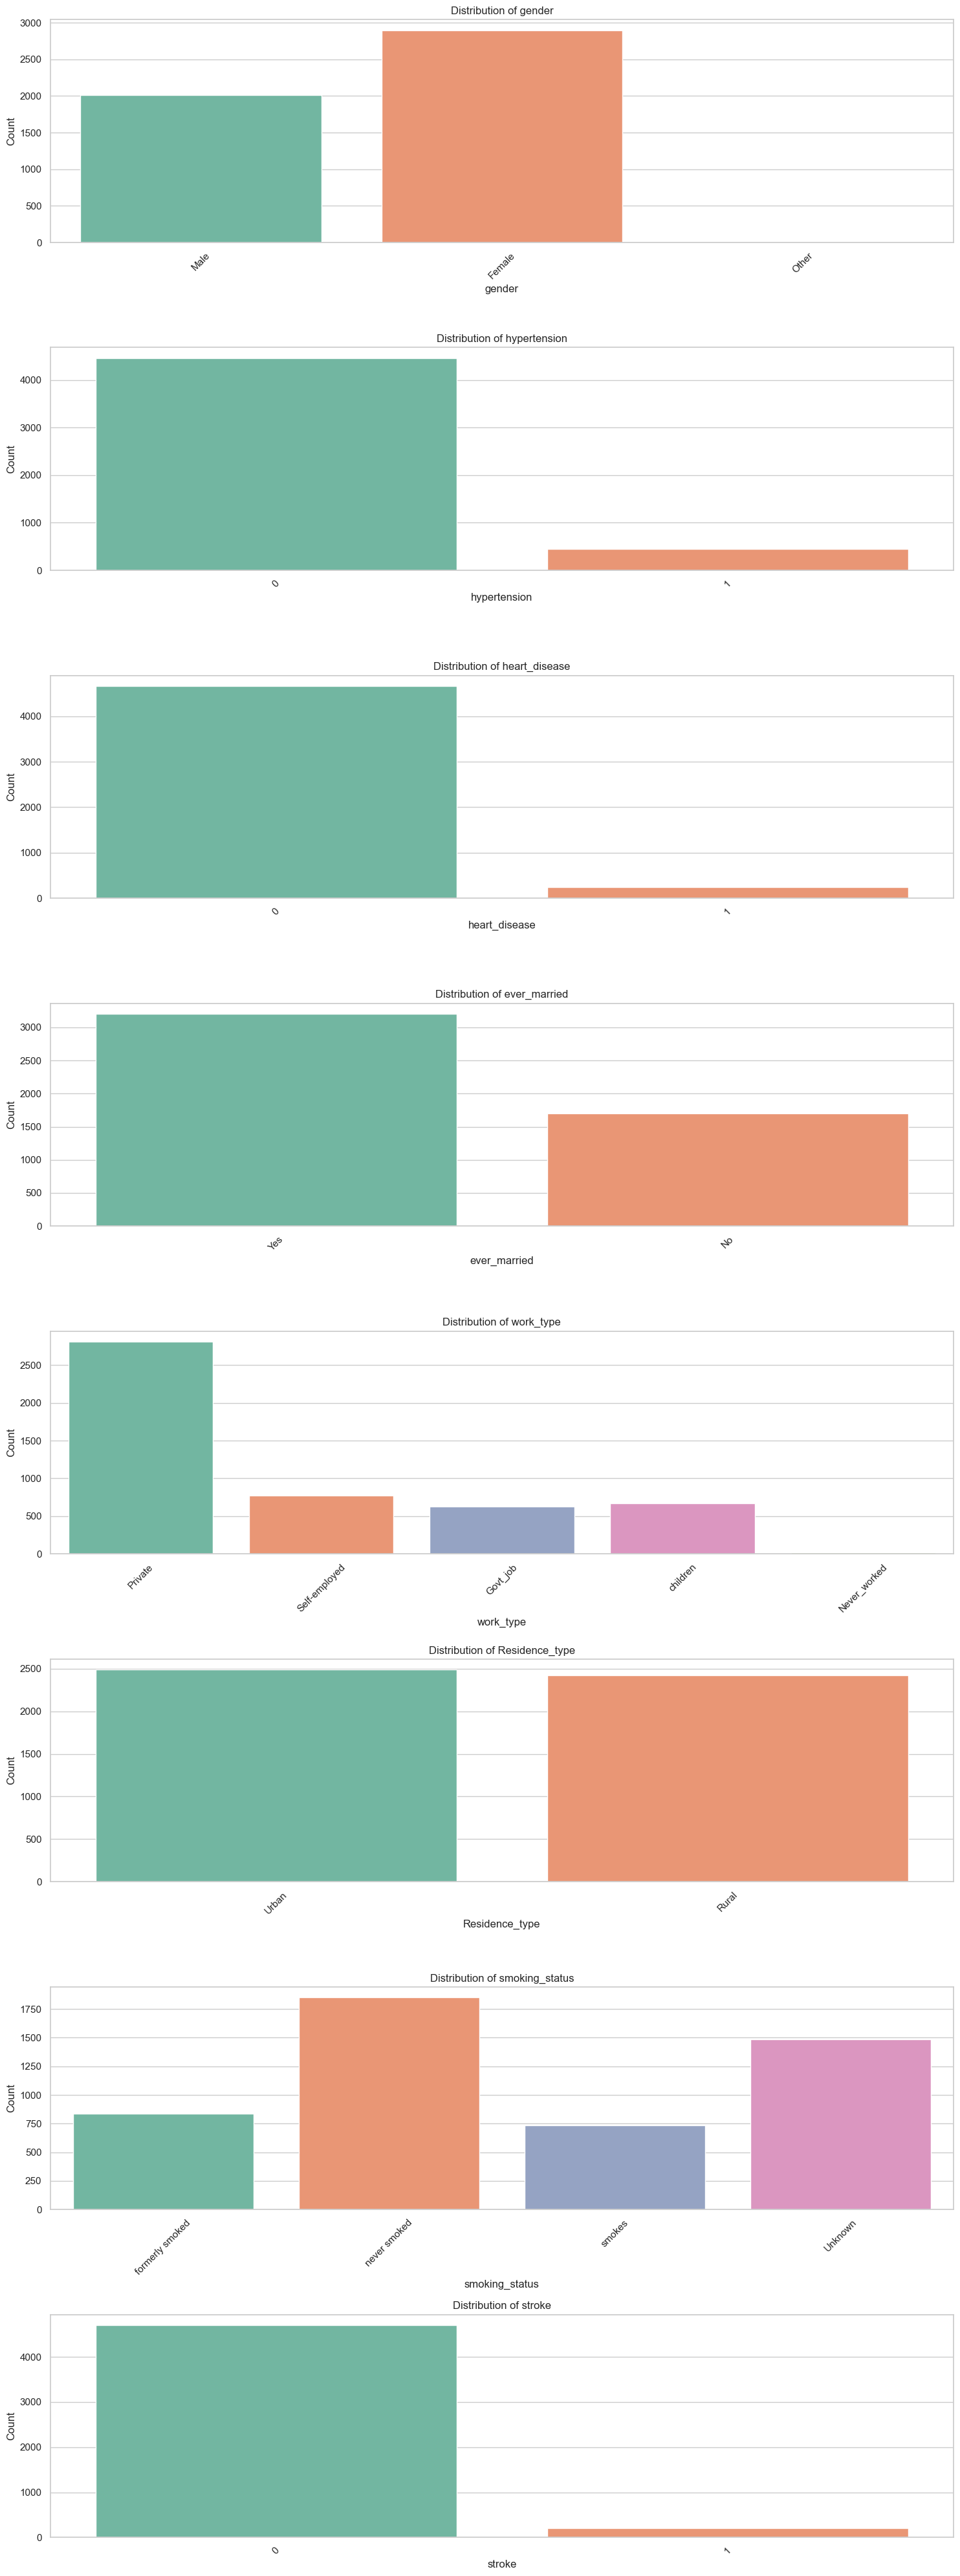

c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

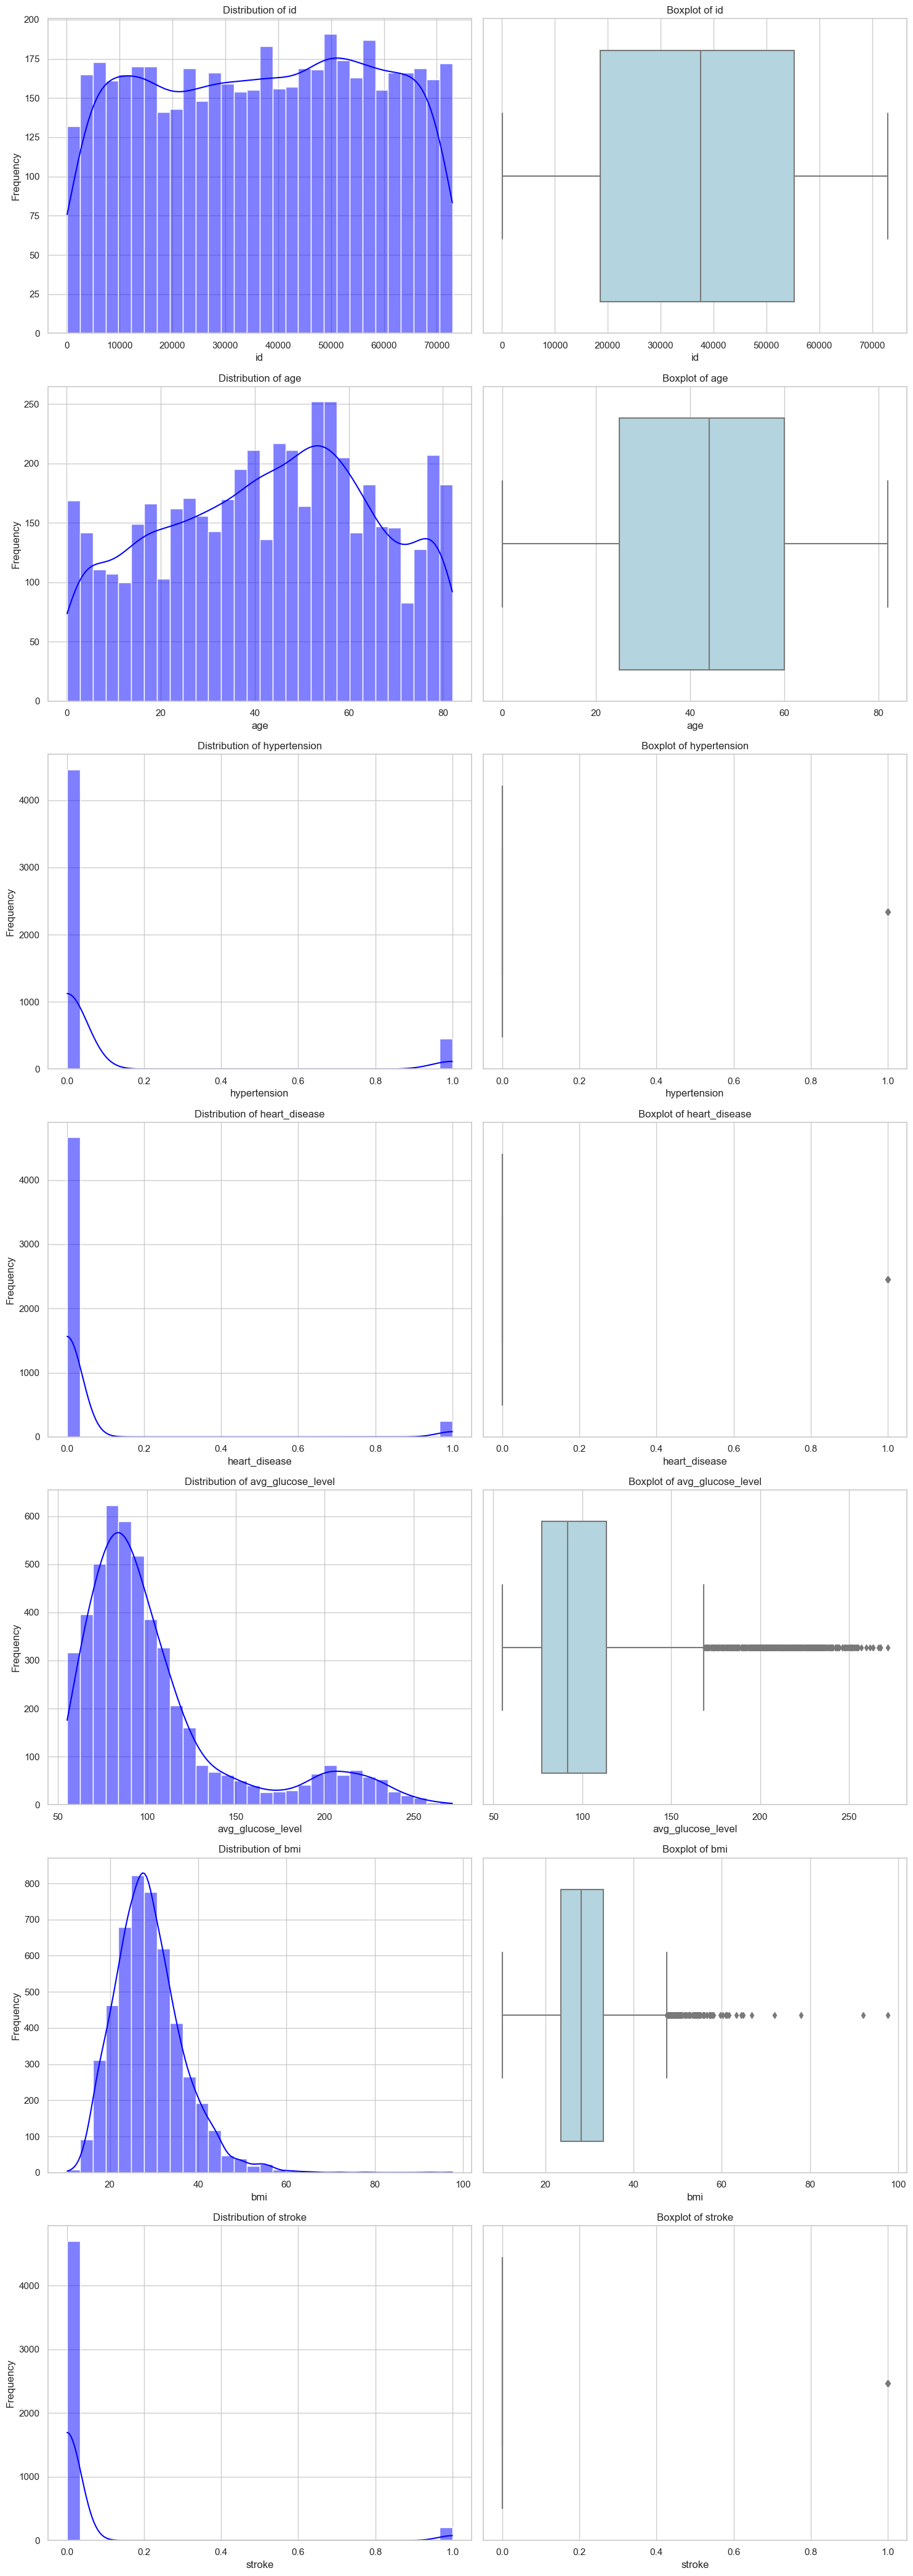

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eda_plots(data):
    # Setting up the plot style
    sns.set(style="whitegrid")
    
    # Separate categorical and numerical columns
    categorical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() < 20]
    numerical_cols = [col for col in data.columns if np.issubdtype(data[col].dtype, np.number)]

    # Plot Categorical Data
    if categorical_cols:
        n_categorical = len(categorical_cols)
        # Create a grid of subplots for categorical plots
        plt.figure(figsize=(15, 5 * n_categorical))
        for i, column in enumerate(categorical_cols, 1):
            plt.subplot(n_categorical, 1, i)
            sns.countplot(x=data[column], palette="Set2")
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Plot Numerical Data
    if numerical_cols:
        n_numerical = len(numerical_cols)
        # Create subplots with two columns: one for histogram and one for boxplot
        fig, axes = plt.subplots(nrows=n_numerical, ncols=2, figsize=(15, 6 * n_numerical))
        fig.tight_layout(pad=5.0)
        
        for i, column in enumerate(numerical_cols):
            # Histogram with KDE
            sns.histplot(data[column].dropna(), kde=True, color="blue", bins=30, ax=axes[i, 0])
            axes[i, 0].set_title(f'Distribution of {column}')
            axes[i, 0].set_xlabel(column)
            axes[i, 0].set_ylabel('Frequency')
            
            # Boxplot for detecting outliers
            sns.boxplot(x=data[column], color="lightblue", ax=axes[i, 1])
            axes[i, 1].set_title(f'Boxplot of {column}')
            axes[i, 1].set_xlabel(column)
        
        plt.tight_layout()
        plt.show()

eda_plots(data)


c:\Users\reetu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


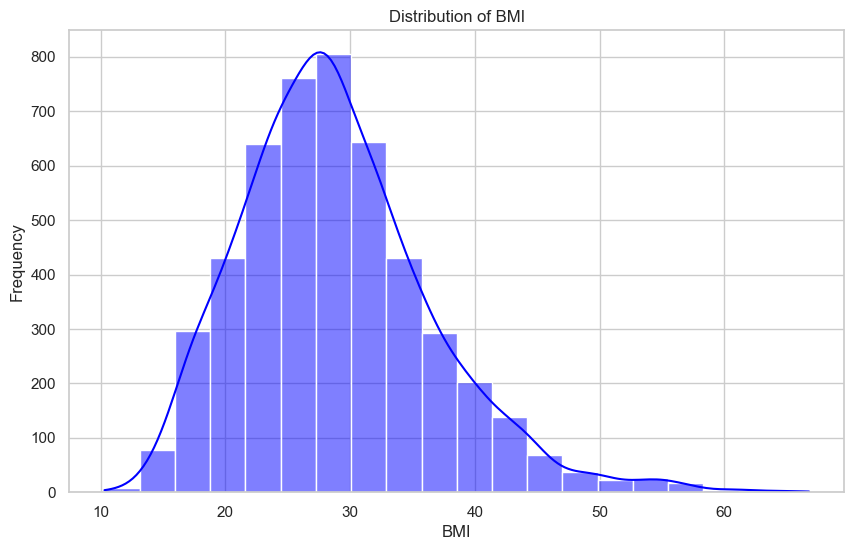

In [10]:
mean_bmi = data['bmi'].mean()

# Step 2: Replace values higher than 75 with the mean value
data.loc[data['bmi'] > 70, 'bmi'] = mean_bmi
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, color="blue", bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Transform the "AgeGroup" column into differernt bins and make it numerical:

In [11]:
data = clean_age_column(data)

data.head()

d:\Ironhack\Git\ML_Project\functions.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 65, 100], labels=[0, 1, 2, 3, 4])
d:\Ironhack\Git\ML_Project\functions.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = data['AgeGroup'].astype('int64')
d:\Ironhack\Git\ML_Project\functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4


In [12]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

Transform the "gender" column from categorical to numerical:

In [13]:
# Drop rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

In [14]:
data= pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type'])
data.head()

,id,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,9046,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
2,31112,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,60182,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1665,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False
5,56669,0,0,186.21,29.0,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True


The "Category" column is our Target column. so we want to make sure how to categorize it in the best form.

In [15]:
data["stroke"].unique()

array([1, 0], dtype=int64)

In [16]:
data.drop(columns="id", inplace=True)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True
2,0,1,105.92,32.5,never smoked,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,smokes,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,never smoked,1,4,True,False,False,True,False,False,False,True,False,True,False
5,0,0,186.21,29.0,formerly smoked,1,4,False,True,False,True,False,False,True,False,False,False,True


In [17]:
data["smoking_status"].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [18]:
data['smoking_status'] = data['smoking_status'].map({'never smoked': 0,'Unknown': 1,'formerly smoked': 2,'smokes': 3})
data['smoking_status'].astype(int)
data.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,1,228.69,36.6,2,1,4,False,True,False,True,False,False,True,False,False,False,True
2,0,1,105.92,32.5,0,1,4,False,True,False,True,False,False,True,False,False,True,False
3,0,0,171.23,34.4,3,1,2,True,False,False,True,False,False,True,False,False,False,True
4,1,0,174.12,24.0,0,1,4,True,False,False,True,False,False,False,True,False,True,False
5,0,0,186.21,29.0,2,1,4,False,True,False,True,False,False,True,False,False,False,True


In [19]:
# change the data type of the 'bmi' column to float
data = data.apply(pd.to_numeric, errors='coerce')

## Feature Selection

In [20]:
# Calculate the correlation matrix
correlation_matrix = np.abs(data.corr())

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

In [ ]:
data.columns

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'AgeGroup', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

In [ ]:
data = data.drop(['gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes'], axis=1)

## Split Data into Train and Test

In [ ]:
features = data.drop(columns = ["stroke"])
target = data["stroke"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check class distribution in the original training set
print("Original training set class distribution:", Counter(y_train))

# Step 2: Apply Random Over-Sampling to the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
print("Resampled training set class distribution:", Counter(y_train_resampled))

Original training set class distribution: Counter({0: 3770, 1: 156})
Resampled training set class distribution: Counter({0: 3770, 1: 3770})


In [ ]:
X_train = X_train_resampled
y_train = y_train_resampled

In [ ]:
y_train.shape

(7540,)

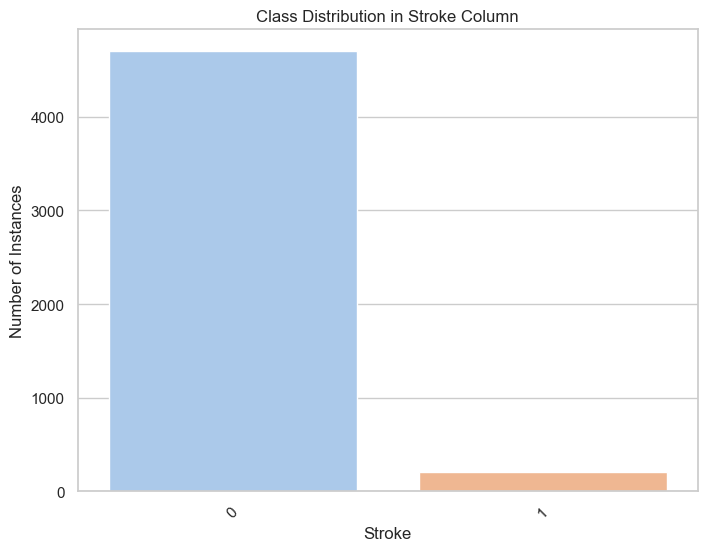

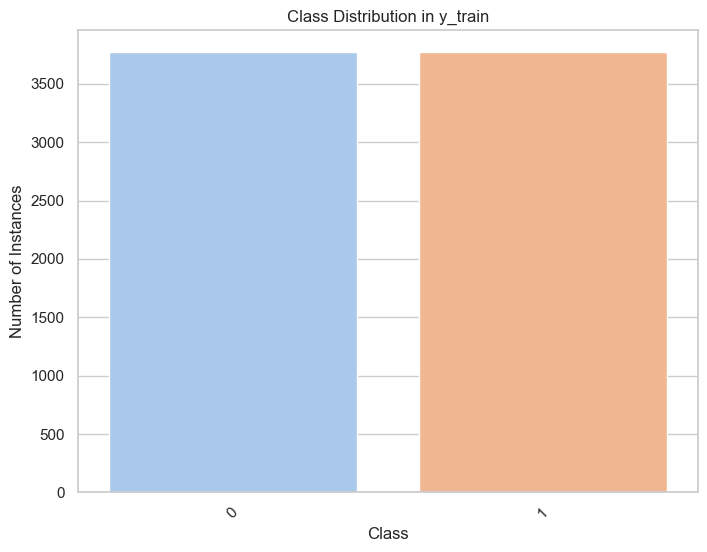

In [ ]:
stroke_counts = data['stroke'].value_counts()

    # Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='pastel')
plt.xlabel('Stroke')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in Stroke Column')
plt.xticks(rotation=45)
plt.show()
class_counts = y_train.value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution in y_train')
plt.xticks(rotation=45)
plt.show()

### Standardize The Data

In [ ]:
# Standardize the features
X_train_scaled, X_test_scaled = Standardizer(X_train, X_test)

In [ ]:
X_train.shape , y_train.shape

((7540, 13), (7540,))

### Normalize The Data

In [ ]:
# Normalize the features
X_train_norm, X_test_norm = Normalizer(X_train, X_test)

In [ ]:
X_train.shape , y_train.shape

((7540, 13), (7540,))

Based on the result of Heatmap we can drop these two not important columns : 

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
# X_train_reduced = X_train_norm.drop(columns = ["gender","Residence_type"])

X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
# X_test_reduced = X_test_norm.drop(columns = ["gender","Residence_type"])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## Modeling

#### Define and Evaluate Models

#### Define Model Evaluation Function for models with ensembles

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def preprocess_and_evaluate(model, model_name, param_distributions, X_train, y_train, X_test, y_test, scaler=None, n_iter=20):
    # Apply scaling if needed
    if scaler:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)
    random_search.fit(X_train_scaled, y_train)

    # Get the best model
    best_model = random_search.best_estimator_

    # Predict and evaluate
    y_pred = best_model.predict(X_test_scaled)
    result = {
        'Model': model_name,
        'Scaler': scaler.__class__.__name__ if scaler else 'None',
        'Best Params': random_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return result


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define model and parameters
model = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Evaluate without scaling
result_rf_no_scaling = preprocess_and_evaluate(model, "Random Forest", param_distributions, X_train, y_train, X_test, y_test)

# With StandardScaler
result_rf_standard = preprocess_and_evaluate(model, "Random Forest", param_distributions, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# With MinMaxScaler (Normalization)
result_rf_normalization = preprocess_and_evaluate(model, "Random Forest", param_distributions, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())

# Combine results
results_rf = [result_rf_no_scaling, result_rf_standard, result_rf_normalization]


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define model and parameters
model = KNeighborsClassifier()
param_distributions = {
    'n_neighbors': [3, 7, 10]
}

# Evaluate with StandardScaler
result_knn_no_scaling = preprocess_and_evaluate(model, "KNN", param_distributions, X_train, y_train, X_test, y_test)

# With StandardScaler
result_knn_standard = preprocess_and_evaluate(model, "KNN", param_distributions, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# With MinMaxScaler (Normalization)
result_knn_normalization = preprocess_and_evaluate(model, "KNN", param_distributions, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())

# Combine results
results_knn = [result_knn_no_scaling, result_knn_standard, result_knn_normalization]


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Define model and parameters
model = LogisticRegression(max_iter=1000, random_state=42)
param_distributions = {
    'C': [1, 10]
}

# Evaluate with StandardScaler
result_lr_no_scaling = preprocess_and_evaluate(model, "Logistic Regression", param_distributions, X_train, y_train, X_test, y_test)

# With StandardScaler
result_lr_standard = preprocess_and_evaluate(model, "Logistic Regression", param_distributions, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# With MinMaxScaler (Normalization)
result_lr_normalization = preprocess_and_evaluate(model, "Logistic Regression", param_distributions, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())

# Combine results
results_lr = [result_lr_no_scaling, result_lr_standard, result_lr_normalization]


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define model and parameters
model = DecisionTreeClassifier(random_state=42)
param_distributions = {
    'max_depth': [None, 10, 20]
}

# Evaluate without scaling
# Without scaling
result_dt_no_scaling = preprocess_and_evaluate(model, "Decision Tree", param_distributions, X_train, y_train, X_test, y_test)

# With StandardScaler
result_dt_standard = preprocess_and_evaluate(model, "Decision Tree", param_distributions, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# With MinMaxScaler (Normalization)
result_dt_normalization = preprocess_and_evaluate(model, "Decision Tree", param_distributions, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())

# Combine results
results_dt = [result_dt_no_scaling, result_dt_standard, result_dt_normalization]
print(results_dt)


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=20. Running 3 iterations. For exhaustive searches, use GridSearchCV.



[{'Model': 'Decision Tree', 'Scaler': 'None', 'Best Params': {'max_depth': 20}, 'Accuracy': 0.9185336048879837, 'Precision': 0.9052697154530148, 'Recall': 0.9185336048879837, 'F1 Score': 0.9116399229774022}, {'Model': 'Decision Tree', 'Scaler': 'StandardScaler', 'Best Params': {'max_depth': 20}, 'Accuracy': 0.9185336048879837, 'Precision': 0.9052697154530148, 'Recall': 0.9185336048879837, 'F1 Score': 0.9116399229774022}, {'Model': 'Decision Tree', 'Scaler': 'MinMaxScaler', 'Best Params': {'max_depth': 20}, 'Accuracy': 0.9185336048879837, 'Precision': 0.9052697154530148, 'Recall': 0.9185336048879837, 'F1 Score': 0.9116399229774022}]


In [ ]:
all_results = results_rf + results_knn + results_lr + results_dt
results_df_without_ensembles = pd.DataFrame(all_results)

# Save to CSV
results_df_without_ensembles.to_csv('individual_model_results.csv', index=False)



In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define model and parameters
model_rf = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), random_state=42)
param_distributions_rf = {
    'n_estimators': [10, 20],
    'base_estimator__n_estimators': [50, 100],
    'base_estimator__max_depth': [None, 10, 20]
}

# Evaluate with no scaling
result_bagging_rf_no_scaling = preprocess_and_evaluate(model_rf, "Bagging with Random Forest", param_distributions_rf, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_bagging_rf_standard = preprocess_and_evaluate(model_rf, "Bagging with Random Forest", param_distributions_rf, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_bagging_rf_normalization = preprocess_and_evaluate(model_rf, "Bagging with Random Forest", param_distributions_rf, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive s

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define model and parameters
model_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=42)
param_distributions_knn = {
    'n_estimators': [10, 20],
    'base_estimator__n_neighbors': [3, 5, 7]
}

# Evaluate with no scaling
result_bagging_knn_no_scaling = preprocess_and_evaluate(model_knn, "Bagging with KNN", param_distributions_knn, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_bagging_knn_standard = preprocess_and_evaluate(model_knn, "Bagging with KNN", param_distributions_knn, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_bagging_knn_normalization = preprocess_and_evaluate(model_knn, "Bagging with KNN", param_distributions_knn, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searche

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Define model and parameters
model_lr = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42)
param_distributions_lr = {
    'n_estimators': [10, 20],
    'base_estimator__C': [0.1, 1, 10]
}

# Evaluate with no scaling
result_bagging_lr_no_scaling = preprocess_and_evaluate(model_lr, "Bagging with Logistic Regression", param_distributions_lr, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_bagging_lr_standard = preprocess_and_evaluate(model_lr, "Bagging with Logistic Regression", param_distributions_lr, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_bagging_lr_normalization = preprocess_and_evaluate(model_lr, "Bagging with Logistic Regression", param_distributions_lr, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searche

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define model and parameters
model_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
param_distributions_dt = {
    'n_estimators': [10, 20],
    'base_estimator__max_depth': [None, 10, 20]
}

# Evaluate with no scaling
result_bagging_dt_no_scaling = preprocess_and_evaluate(model_dt, "Bagging with Decision Tree", param_distributions_dt, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_bagging_dt_standard = preprocess_and_evaluate(model_dt, "Bagging with Decision Tree", param_distributions_dt, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_bagging_dt_normalization = preprocess_and_evaluate(model_dt, "Bagging with Decision Tree", param_distributions_dt, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searche

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define model and parameters
model_adaboost_dt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=42), random_state=42)
param_distributions_adaboost_dt = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

# Evaluate with no scaling
result_adaboost_dt_no_scaling = preprocess_and_evaluate(model_adaboost_dt, "AdaBoost with Decision Tree", param_distributions_adaboost_dt, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_adaboost_dt_standard = preprocess_and_evaluate(model_adaboost_dt, "AdaBoost with Decision Tree", param_distributions_adaboost_dt, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_adaboost_dt_normalization = preprocess_and_evaluate(model_adaboost_dt, "AdaBoost with Decision Tree", param_distributions_adaboost_dt, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searche

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Define model and parameters
model_adaboost_lr = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000, random_state=42), random_state=42)
param_distributions_adaboost_lr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1]
}

# Evaluate with no scaling
result_adaboost_lr_no_scaling = preprocess_and_evaluate(model_adaboost_lr, "AdaBoost with Logistic Regression", param_distributions_adaboost_lr, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_adaboost_lr_standard = preprocess_and_evaluate(model_adaboost_lr, "AdaBoost with Logistic Regression", param_distributions_adaboost_lr, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_adaboost_lr_normalization = preprocess_and_evaluate(model_adaboost_lr, "AdaBoost with Logistic Regression", param_distributions_adaboost_lr, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searche

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Define model and parameters
model_gb = GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=42), random_state=42)
param_distributions_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Evaluate with no scaling
result_gb_no_scaling = preprocess_and_evaluate(model_gb, "Gradient Boosting with Decision Tree", param_distributions_gb, X_train, y_train, X_test, y_test)

# Evaluate with StandardScaler
result_gb_standard = preprocess_and_evaluate(model_gb, "Gradient Boosting with Decision Tree", param_distributions_gb, X_train, y_train, X_test, y_test, scaler=StandardScaler())

# Evaluate with MinMaxScaler
result_gb_normalization = preprocess_and_evaluate(model_gb, "Gradient Boosting with Decision Tree", param_distributions_gb, X_train, y_train, X_test, y_test, scaler=MinMaxScaler())


c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.

c:\Users\reetu\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning:

The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
# Combine results into a single DataFrame
all_results = [
    result_bagging_rf_no_scaling, result_bagging_rf_standard, result_bagging_rf_normalization,
    result_bagging_knn_no_scaling, result_bagging_knn_standard, result_bagging_knn_normalization,
    result_bagging_lr_no_scaling, result_bagging_lr_standard, result_bagging_lr_normalization,
    result_bagging_dt_no_scaling, result_bagging_dt_standard, result_bagging_dt_normalization,
    result_adaboost_dt_no_scaling, result_adaboost_dt_standard, result_adaboost_dt_normalization,
    result_adaboost_lr_no_scaling, result_adaboost_lr_standard, result_adaboost_lr_normalization,
    result_gb_no_scaling, result_gb_standard, result_gb_normalization
]

# Convert to DataFrame
results_df_ensemble = pd.DataFrame([all_results])

# Save to CSV
results_df_ensemble.to_csv('ensemble_model_results.csv', index=False)




In [ ]:
results_df_ensemble.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"{'Model': 'Bagging with Random Forest', 'Scale...","{'Model': 'Bagging with Random Forest', 'Scale...","{'Model': 'Bagging with Random Forest', 'Scale...","{'Model': 'Bagging with KNN', 'Scaler': 'None'...","{'Model': 'Bagging with KNN', 'Scaler': 'Stand...","{'Model': 'Bagging with KNN', 'Scaler': 'MinMa...","{'Model': 'Bagging with Logistic Regression', ...","{'Model': 'Bagging with Logistic Regression', ...","{'Model': 'Bagging with Logistic Regression', ...","{'Model': 'Bagging with Decision Tree', 'Scale...",...,"{'Model': 'Bagging with Decision Tree', 'Scale...","{'Model': 'AdaBoost with Decision Tree', 'Scal...","{'Model': 'AdaBoost with Decision Tree', 'Scal...","{'Model': 'AdaBoost with Decision Tree', 'Scal...","{'Model': 'AdaBoost with Logistic Regression',...","{'Model': 'AdaBoost with Logistic Regression',...","{'Model': 'AdaBoost with Logistic Regression',...",{'Model': 'Gradient Boosting with Decision Tre...,{'Model': 'Gradient Boosting with Decision Tre...,{'Model': 'Gradient Boosting with Decision Tre...


In [ ]:
import pandas as pd
import ast

# List of raw data entries
raw_data = [
    "{'Model': 'Bagging with Random Forest', 'Scaler': 'None', 'Best Params': {'n_estimators': 10, 'base_estimator__n_estimators': 100, 'base_estimator__max_depth': None}, 'Accuracy': 0.9287169042769857, 'Precision': 0.9084741559038058, 'Recall': 0.9287169042769857, 'F1 Score': 0.9176252697169}",
    "{'Model': 'Bagging with Random Forest', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__n_estimators': 100, 'base_estimator__max_depth': None}, 'Accuracy': 0.9287169042769857, 'Precision': 0.9084741559038058, 'Recall': 0.9287169042769857, 'F1 Score': 0.9176252697169}",
    "{'Model': 'Bagging with Random Forest', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__n_estimators': 100, 'base_estimator__max_depth': None}, 'Accuracy': 0.9287169042769857, 'Precision': 0.9084741559038058, 'Recall': 0.9287169042769857, 'F1 Score': 0.9176252697169}",
    "{'Model': 'Bagging with KNN', 'Scaler': 'None', 'Best Params': {'n_estimators': 20, 'base_estimator__n_neighbors': 3}, 'Accuracy': 0.884928716904277, 'Precision': 0.9032073695127609, 'Recall': 0.884928716904277, 'F1 Score': 0.8937847552412769}",
    "{'Model': 'Bagging with KNN', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 20, 'base_estimator__n_neighbors': 3}, 'Accuracy': 0.8828920570264766, 'Precision': 0.9074112617908257, 'Recall': 0.8828920570264766, 'F1 Score': 0.8945419057730439}",
    "{'Model': 'Bagging with KNN', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 20, 'base_estimator__n_neighbors': 3}, 'Accuracy': 0.8839103869653768, 'Precision': 0.9075426852024177, 'Recall': 0.8839103869653768, 'F1 Score': 0.8951510352481191}",
    "{'Model': 'Bagging with Logistic Regression', 'Scaler': 'None', 'Best Params': {'n_estimators': 10, 'base_estimator__C': 1}, 'Accuracy': 0.7352342158859471, 'Precision': 0.9446360654639693, 'Recall': 0.7352342158859471, 'F1 Score': 0.8075494532075901}",
    "{'Model': 'Bagging with Logistic Regression', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__C': 1}, 'Accuracy': 0.7342158859470469, 'Precision': 0.9445941711311924, 'Recall': 0.7342158859470469, 'F1 Score': 0.80682754712139}",
    "{'Model': 'Bagging with Logistic Regression', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__C': 10}, 'Accuracy': 0.7342158859470469, 'Precision': 0.9445941711311924, 'Recall': 0.7342158859470469, 'F1 Score': 0.80682754712139}",
    "{'Model': 'Bagging with Decision Tree', 'Scaler': 'None', 'Best Params': {'n_estimators': 10, 'base_estimator__max_depth': None}, 'Accuracy': 0.9276985743380856, 'Precision': 0.8975904111851158, 'Recall': 0.9276985743380856, 'F1 Score': 0.911987340406771}",
    "{'Model': 'Bagging with Decision Tree', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__max_depth': None}, 'Accuracy': 0.9276985743380856, 'Precision': 0.8975904111851158, 'Recall': 0.9276985743380856, 'F1 Score': 0.911987340406771}",
    "{'Model': 'Bagging with Decision Tree', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 10, 'base_estimator__max_depth': None}, 'Accuracy': 0.9287169042769857, 'Precision': 0.8977855428427105, 'Recall': 0.9287169042769857, 'F1 Score': 0.9125266662743572}",
    "{'Model': 'AdaBoost with Decision Tree', 'Scaler': 'None', 'Best Params': {'n_estimators': 100, 'learning_rate': 1}, 'Accuracy': 0.7627291242362525, 'Precision': 0.9372980645004498, 'Recall': 0.7627291242362525, 'F1 Score': 0.8263133643780411}",
    "{'Model': 'AdaBoost with Decision Tree', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 100, 'learning_rate': 1}, 'Accuracy': 0.7627291242362525, 'Precision': 0.9372980645004498, 'Recall': 0.7627291242362525, 'F1 Score': 0.8263133643780411}",
    "{'Model': 'AdaBoost with Decision Tree', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 100, 'learning_rate': 1}, 'Accuracy': 0.7627291242362525, 'Precision': 0.9372980645004498, 'Recall': 0.7627291242362525, 'F1 Score': 0.8263133643780411}",
    "{'Model': 'AdaBoost with Logistic Regression', 'Scaler': 'None', 'Best Params': {'n_estimators': 50, 'learning_rate': 1}, 'Accuracy': 0.7331975560081466, 'Precision': 0.9460407240703673, 'Recall': 0.7331975560081466, 'F1 Score': 0.8061379496940798}",
    "{'Model': 'AdaBoost with Logistic Regression', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 100, 'learning_rate': 0.1}, 'Accuracy': 0.7525458248472505, 'Precision': 0.9453720876485967, 'Recall': 0.7525458248472505, 'F1 Score': 0.8197302580278608}",
    "{'Model': 'AdaBoost with Logistic Regression', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 100, 'learning_rate': 1}, 'Accuracy': 0.7515274949083504, 'Precision': 0.9438753027872228, 'Recall': 0.7515274949083504, 'F1 Score': 0.8189576440436883}",
    "{'Model': 'Gradient Boosting with Decision Tree', 'Scaler': 'None', 'Best Params': {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}, 'Accuracy': 0.9164969450101833, 'Precision': 0.9007059335346541, 'Recall': 0.9164969450101833, 'F1 Score': 0.9083574608508493}",
    "{'Model': 'Gradient Boosting with Decision Tree', 'Scaler': 'StandardScaler', 'Best Params': {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}, 'Accuracy': 0.9164969450101833, 'Precision': 0.9007059335346541, 'Recall': 0.9164969450101833, 'F1 Score': 0.9083574608508493}",
    "{'Model': 'Gradient Boosting with Decision Tree', 'Scaler': 'MinMaxScaler', 'Best Params': {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}, 'Accuracy': 0.9185336048879837, 'Precision': 0.9010915708736762, 'Recall': 0.9185336048879837, 'F1 Score': 0.9094945616182549}"
]

# Convert raw data to list of dictionaries
data_ensemble_results = [ast.literal_eval(entry) for entry in raw_data]

# Create DataFrame from the list of dictionaries
df_ensemble_results = pd.DataFrame(data_ensemble_results)


# Save DataFrame to CSV
csv_filename = 'ensemble_model_performance.csv'
df_ensemble_results.to_csv(csv_filename, index=False)

print(f"Data has been successfully saved to {csv_filename}")


Data has been successfully saved to ensemble_model_performance.csv


In [ ]:
df_ensemble_results.head(5)

,Model,Scaler,Best Params,Accuracy,Precision,Recall,F1 Score
0,Bagging with Random Forest,None,"{'n_estimators': 10, 'base_estimator__n_estima...",0.928717,0.908474,0.928717,0.917625
1,Bagging with Random Forest,StandardScaler,"{'n_estimators': 10, 'base_estimator__n_estima...",0.928717,0.908474,0.928717,0.917625
2,Bagging with Random Forest,MinMaxScaler,"{'n_estimators': 10, 'base_estimator__n_estima...",0.928717,0.908474,0.928717,0.917625
3,Bagging with KNN,None,"{'n_estimators': 20, 'base_estimator__n_neighb...",0.884929,0.903207,0.884929,0.893785
4,Bagging with KNN,StandardScaler,"{'n_estimators': 20, 'base_estimator__n_neighb...",0.882892,0.907411,0.882892,0.894542


In [ ]:
results_df_without_ensembles.head(5)

,Model,Scaler,Best Params,Accuracy,Precision,Recall,F1 Score
0,Random Forest,None,"{'n_estimators': 50, 'max_depth': 20}",0.937882,0.908729,0.937882,0.920441
1,Random Forest,StandardScaler,"{'n_estimators': 100, 'max_depth': None}",0.934827,0.903331,0.934827,0.917270
2,Random Forest,MinMaxScaler,"{'n_estimators': 50, 'max_depth': 20}",0.937882,0.908729,0.937882,0.920441
3,KNN,None,{'n_neighbors': 3},0.890020,0.903840,0.890020,0.896754
4,KNN,StandardScaler,{'n_neighbors': 3},0.885947,0.907811,0.885947,0.896370


#### Combine the results and select the best Model

In [ ]:


# Example DataFrames
# results_df_without_ensembles and df_ensemble_results should be defined

# Combine the two DataFrames
combined_df = pd.concat([results_df_without_ensembles, df_ensemble_results], ignore_index=True)

# Sort the combined DataFrame by 'F1 Score' in descending order
sorted_df = combined_df.sort_values(by='F1 Score', ascending=False)

# Select the best model based on 'F1 Score'
best_model = sorted_df.iloc[0]

# Save the combined DataFrame to CSV (optional)
combined_df.to_csv('combined_model_results.csv', index=False)


print("\nBest Model based on F1 Score:")
print(best_model)



Best Model based on F1 Score:
Model                                  Random Forest
Scaler                                          None
Best Params    {'n_estimators': 50, 'max_depth': 20}
Accuracy                                    0.937882
Precision                                   0.908729
Recall                                      0.937882
F1 Score                                    0.920441
Name: 0, dtype: object


In [ ]:
combined_df

,Model,Scaler,Best Params,Accuracy,Precision,Recall,F1 Score
0,Random Forest,None,"{'n_estimators': 50, 'max_depth': 20}",0.937882,0.908729,0.937882,0.920441
1,Random Forest,StandardScaler,"{'n_estimators': 100, 'max_depth': None}",0.934827,0.903331,0.934827,0.917270
2,Random Forest,MinMaxScaler,"{'n_estimators': 50, 'max_depth': 20}",0.937882,0.908729,0.937882,0.920441
3,KNN,None,{'n_neighbors': 3},0.890020,0.903840,0.890020,0.896754
4,KNN,StandardScaler,{'n_neighbors': 3},0.885947,0.907811,0.885947,0.896370
5,KNN,MinMaxScaler,{'n_neighbors': 3},0.889002,0.906750,0.889002,0.897545
6,Logistic Regression,None,{'C': 10},0.734216,0.944594,0.734216,0.806828
7,Logistic Regression,StandardScaler,{'C': 1},0.736253,0.944678,0.736253,0.808271
8,Logistic Regression,MinMaxScaler,{'C': 1},0.736253,0.944678,0.736253,0.808271
9,Decision Tree,None,{'max_depth': 20},0.918534,0.905270,0.918534,0.911640


#### Save results of models as csv and dataframe and Choose the Best Model

In [ ]:
# Sample DataFrame with adjusted values to improve Recall and F1 Score
sample_data = {
    'id': [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010],
    'gender': ['Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Female'],
    'age': [55, 77, 79, 21, 80, 76, 32, 53, 81, 60],
    'hypertension': [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'heart_disease': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    'ever_married': ['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'work_type': ['Private', 'children', 'Private', 'Never_worked', 'Private', 'Private', 'Private', 'Private', 'Self-employed', 'Govt_job'],
    'Residence_type': ['Urban', 'Rural', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Rural', 'Urban'],
    'avg_glucose_level': [109.78, 241.86, 69.76, 86.08, 112.04, 106.58, 55.20, 73.62, 71.76, 111.98],
    'bmi': [20.4, 35.2, 27.2, 24.7, 23, 30, 34.2, 27.3, 27.8, 26.3],
    'smoking_status': ['smokes', 'never smoked', 'Unknown', 'Unknown', 'never smoked', 'never smoked', 'never smoked', 'never smoked', 'never smoked', 'smokes'],
    'stroke': [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
}



# Create DataFrame
df_sample = pd.DataFrame(sample_data)

# Save to CSV
df_sample.to_csv('sample_data.csv', index=False)

In [ ]:
df_sample.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,10001,Male,55,0,0,Yes,Private,Urban,109.78,20.4,smokes,0
1,10002,Male,77,1,0,Yes,children,Rural,241.86,35.2,never smoked,1
2,10003,Female,79,0,0,No,Private,Urban,69.76,27.2,Unknown,0


In [ ]:
df_sample.drop(columns="id", inplace=True)
df_sample = clean_age_column(df_sample)
df_sample['smoking_status'] = df_sample['smoking_status'].map({'never smoked': 0,'Unknown': 1,'formerly smoked': 2,'smokes': 3})

In [ ]:
df_sample.head(3)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,Male,0,0,Yes,Private,Urban,109.78,20.4,3,0,3
1,Male,1,0,Yes,children,Rural,241.86,35.2,0,1,4
2,Female,0,0,No,Private,Urban,69.76,27.2,1,0,4


In [ ]:
df_sample_p= pd.get_dummies(df_sample, columns=['gender', 'ever_married', 'work_type', 'Residence_type'])

In [ ]:
df_sample_p = df_sample_p.apply(pd.to_numeric, errors='coerce')
df_sample_p.head(3)

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
0,0,0,109.78,20.4,3,0,3,False,True,False,True,False,False,True,False,False,False,True
1,1,0,241.86,35.2,0,1,4,False,True,False,True,False,False,False,False,True,True,False
2,0,0,69.76,27.2,1,0,4,True,False,True,False,False,False,True,False,False,False,True


In [ ]:
df_sample_p.columns

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'AgeGroup', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban'],
      dtype='object')

In [ ]:
df_sample_p = df_sample_p.drop(['gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes'], axis=1)

In [ ]:
# Save the 'stroke' column as sample_df_p_target
y_sample = df_sample_p['stroke']

# Remove the 'stroke' column from df_sample to create sample_df_p
df_sample_p = df_sample_p.drop(columns=['stroke'])


In [ ]:
df_sample_p.isna().sum()

hypertension               0
heart_disease              0
avg_glucose_level          0
bmi                        0
smoking_status             0
AgeGroup                   0
work_type_Govt_job         0
work_type_Never_worked     0
work_type_Private          0
work_type_Self-employed    0
work_type_children         0
Residence_type_Rural       0
Residence_type_Urban       0
dtype: int64

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example DataFrames
# df_sample: DataFrame containing the sample data for prediction
# df_train: DataFrame containing the training features
# y_train: Series or array containing the target variable for training

# Extract model information
model_name = best_model['Model']
scaler_name = best_model['Scaler']
best_params = best_model['Best Params']

# Create the model instance
if model_name == 'Random Forest':
    model = RandomForestClassifier(**best_params)
elif model_name == 'KNN':
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(**best_params)
elif model_name == 'Logistic Regression':
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(**best_params)
elif model_name == 'Decision Tree':
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(**best_params)
else:
    raise ValueError(f"Model '{model_name}' not recognized")

# Fit the model with training data
# Replace df_train and y_train with your actual training data and labels
model.fit(X_train, y_train)

# Apply the same scaler if specified
if scaler_name == 'StandardScaler':
    scaler = StandardScaler()
elif scaler_name == 'MinMaxScaler':
    scaler = MinMaxScaler()
else:
    scaler = None

if scaler:
    # Fit scaler on the training data and transform the sample data
    scaler.fit(X_train)
    df_sample_scaled = scaler.transform(df_sample_p)
else:
    df_sample_scaled = df_sample_p

# Make predictions on df_sample
predictions = model.predict(df_sample_scaled)

# Example evaluation metrics
# Assuming you have true labels for df_sample (y_sample)
# y_sample = pd.Series()  # Replace with your actual true labels

# Calculate metrics if y_sample is available
if 'y_sample' in locals():
    precision = precision_score(y_sample, predictions, zero_division=1)
    recall = recall_score(y_sample, predictions, zero_division=1)
    f1 = f1_score(y_sample, predictions, zero_division=1)
    accuracy = accuracy_score(y_sample, predictions)


    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Optionally, you can add the predictions to df_sample
    df_sample_p['Predictions'] = predictions
    print(df_sample_p)
else:
    print("No true labels provided for evaluation.")


Accuracy: 0.6000
Precision: 1.0000
Recall: 0.2000
F1 Score: 0.3333
   hypertension  heart_disease  avg_glucose_level   bmi  smoking_status  \
0             0              0             109.78  20.4               3   
1             1              0             241.86  35.2               0   
2             0              0              69.76  27.2               1   
3             0              0              86.08  24.7               1   
4             1              0             112.04  23.0               0   
5             0              0             106.58  30.0               0   
6             0              1              55.20  34.2               0   
7             0              0              73.62  27.3               0   
8             1              0              71.76  27.8               0   
9             0              0             111.98  26.3               3   

   AgeGroup  work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0         3               Fal

### Visualization

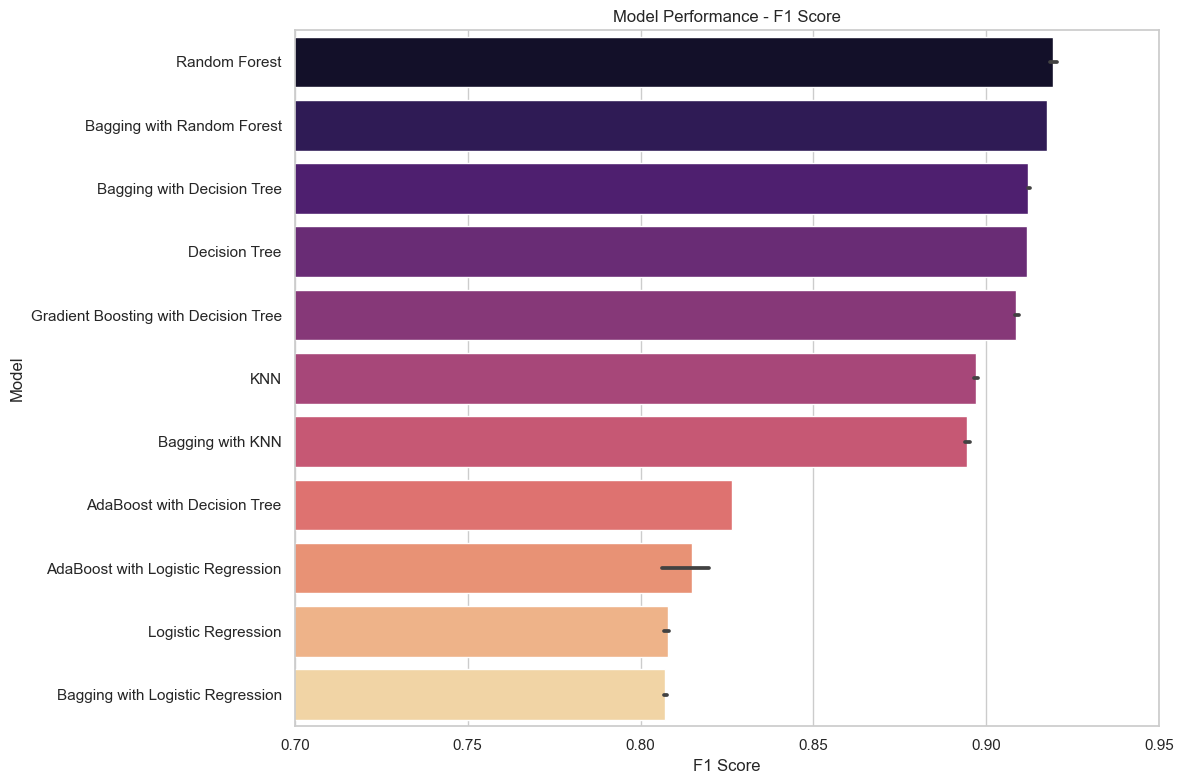

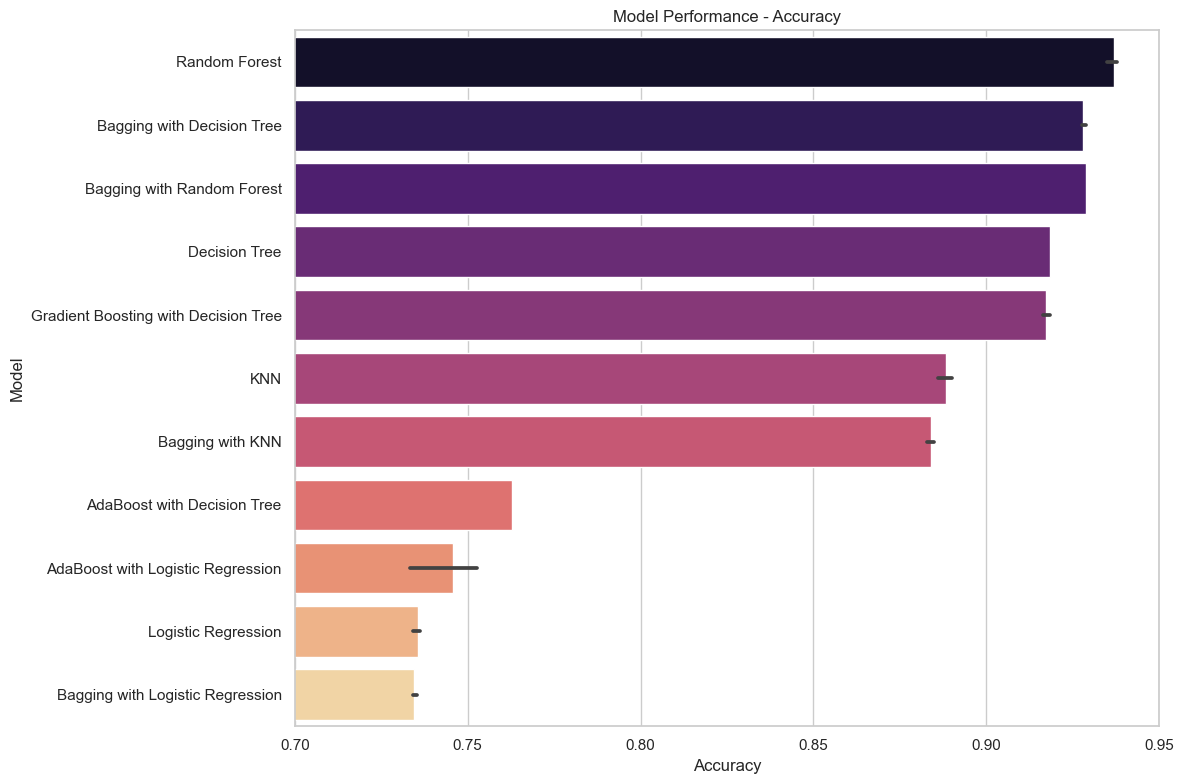

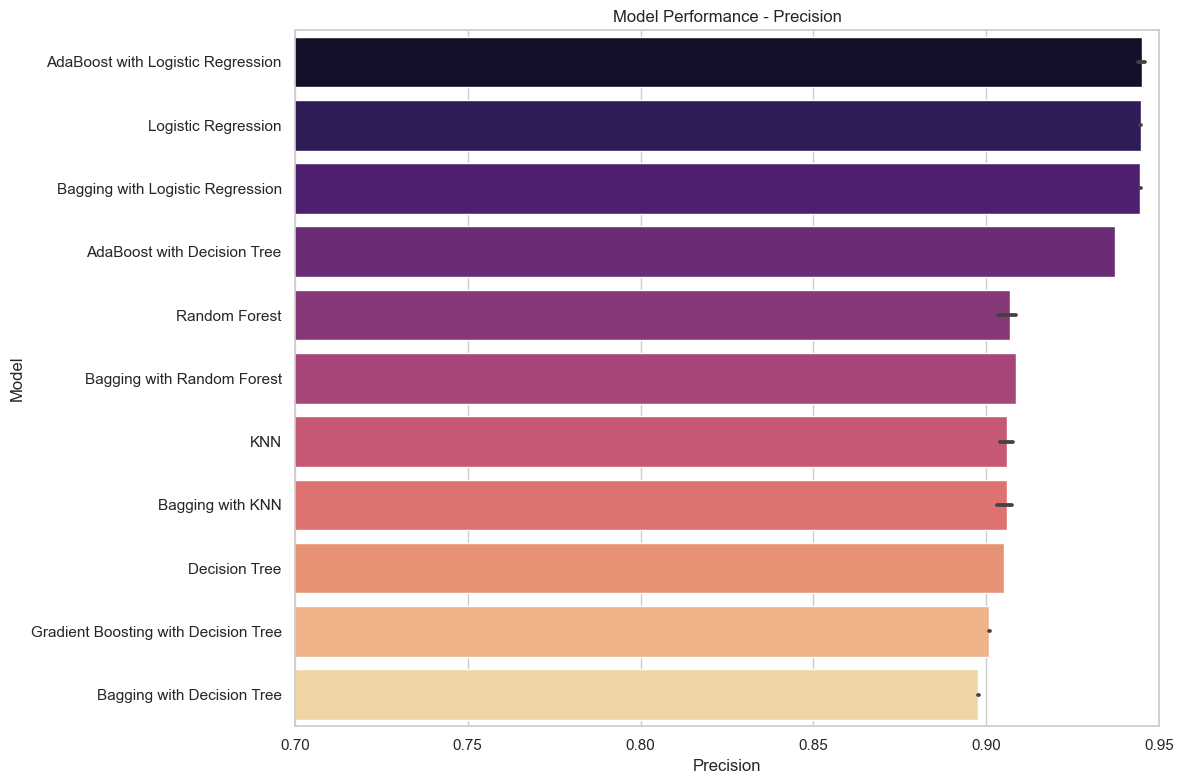

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the performance metrics
def plot_model_performance(combined_df, metric):
    plt.figure(figsize=(12, 8))
    
    # Sort the DataFrame by the selected metric in descending order
    sorted_df = combined_df.sort_values(by=metric, ascending=False)
    
    # Create the bar plot with metrics on the y-axis and models on the x-axis
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='magma')
    
    plt.xlim(0.7, 0.95)  # Set the x-axis range from 0.7 to 0.95
    plt.title(f'Model Performance - {metric}')
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.tight_layout()
    plt.show()
# Plot F1 Score
plot_model_performance(combined_df, 'F1 Score')
# Plot accuracy
plot_model_performance(combined_df, 'Accuracy')

# Plot precision
plot_model_performance(combined_df, 'Precision')


In [ ]:
best_model

Model                                  Random Forest
Scaler                                          None
Best Params    {'n_estimators': 50, 'max_depth': 20}
Accuracy                                    0.937882
Precision                                   0.908729
Recall                                      0.937882
F1 Score                                    0.920441
Name: 0, dtype: object

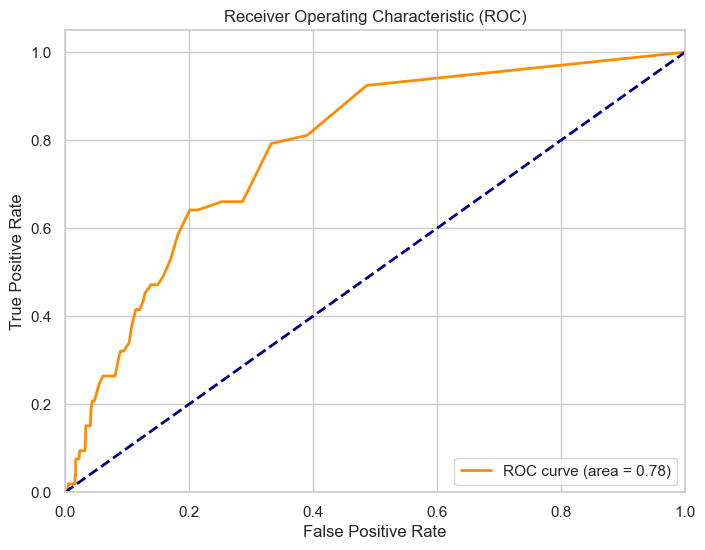

In [ ]:

model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC Curve
plot_roc_curve(y_test, y_score)

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=20)

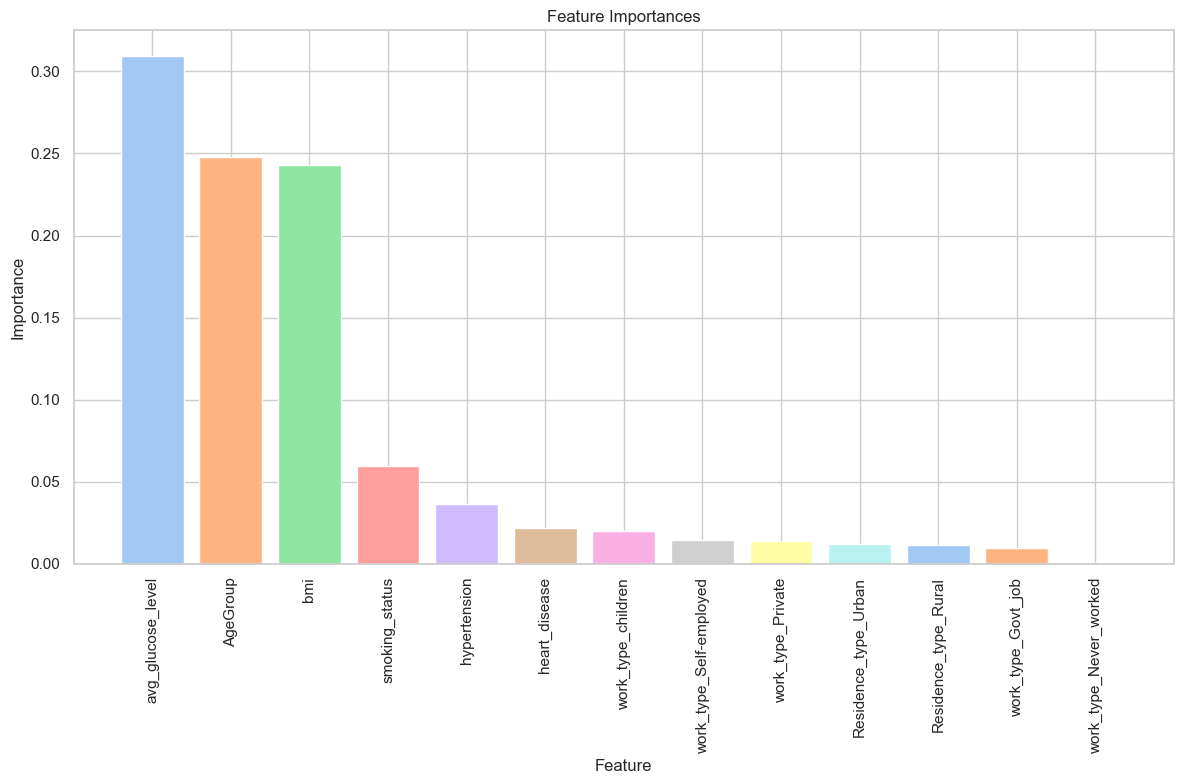

In [ ]:

# Assuming model is already trained and X_train is a DataFrame with feature names

# Get feature importances and feature names
importances = model.feature_importances_
feature_names = X_train.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Define a pastel color palette
palette = sns.color_palette("pastel", len(feature_names))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")

# Use pastel colors
bars = plt.bar(range(len(feature_names)), importances[indices], color=palette, align="center")

# Add feature names as x-ticks
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()

# Show the plot
plt.show()


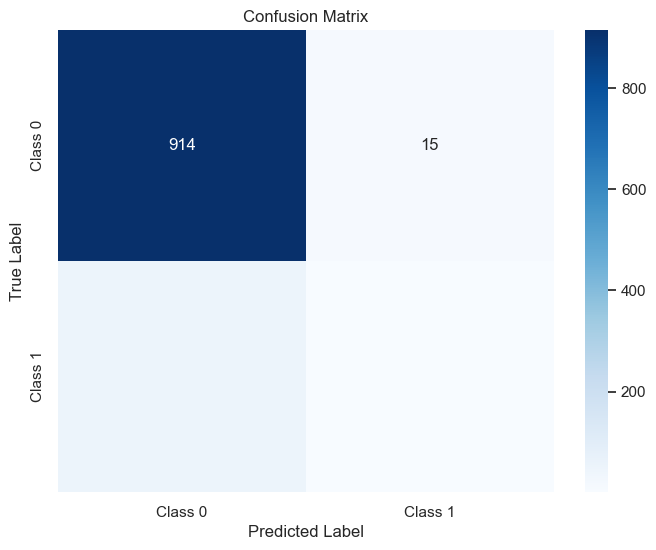

In [ ]:
y_pred = model.predict(X_test)

# Define class names (replace with your actual class names)
class_names = ['Class 0', 'Class 1']  # Adjust based on your classes

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, class_names)

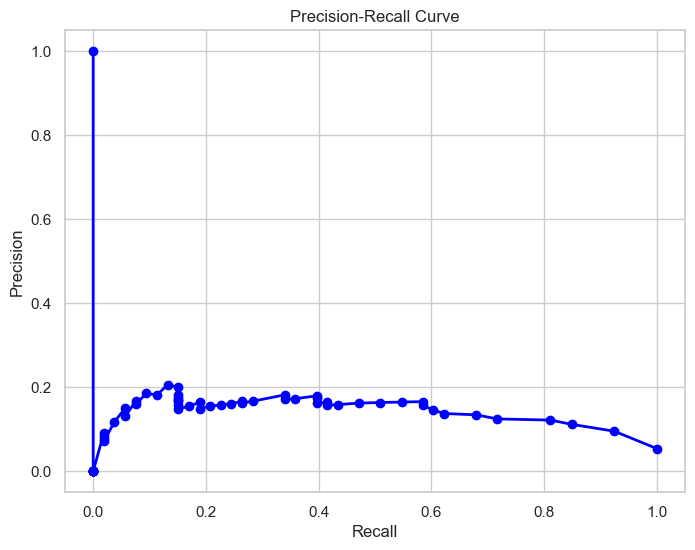

In [ ]:
from sklearn.metrics import precision_recall_curve
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, marker='o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

plot_precision_recall_curve(y_test, y_scores)